# 時系列データの処理

## Pythonにおける日時と時間
## ネイティブなPythonの日時と時間： `datetime`と`dateutil`

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
date.strftime('%A')

'Saturday'

### 型付けされた時間のarray： NumPyの`datetime64`
`datetime64`は日時を64ビットのintegersにエンコードし、そして日時のarrayをとてもコンパクトに表現する。

In [4]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

ここから簡単にベクトル化できる。

In [5]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

`datetime64`や`timedelta64`オブジェクトは、64ビットという制限があるため、時間の精度と最大の時間範囲のトレードオフの問題がある。

例えば、もしナノ秒の時間精度が欲しい場合、600年以下の時間範囲までとなる。

In [6]:
2**64/1e9/3600/24/365

584.942417355072

例えば、日ベースの日時であれば

In [7]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

分ベースであれば

In [8]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

望む時間単位があるならば、指定することもできる。たとえば、ナノ秒ベースならば。

In [9]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

### Pandasでの日時と時間： 両方の世界でのベスト
PandasにはPythonの`datetime`や`dateutil`のような簡便さと、`np.datetime64`のような効率的なストレージとベクトル化されたインターフェースを合わせたような、`Timestamp`オブジェクトがある。これらの`Timestamp`オブジェクトのグループからPandasは`DatetimeIndex`を生成することができ、それは`Series`や`Dataframe`のインデックスデータとして利用することが出来る。

In [10]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [11]:
date.strftime('%A')

'Saturday'

In [12]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandasの時系列： 時間でのインデックス
例えば、時間インデックスをもつ`Series`オブジェクトを生成することが出来る。

In [13]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [14]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [15]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandasの時系列データ構造
Pandasには時系列を扱うための3つのタイプがある。

- タイムスタンプ：`Timestamp`と`DatetimeIndex`
- 期間：`Period`と`PeriodIndex`
- 時間差：`Timedelta`と`TimedeltaIndex`

`Timestamp`は`pd.to_datetime()`を利用して、様々なフォーマットをパースすることが出来る。

In [16]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

いずれの`DatetimeIndex`は、`to_period()`関数と追加の周期コードとともに`PeriodIndex`に変換できる。ここでは日毎を指す`'D'`を利用する。

In [17]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

`TimedeltaIndex`は例えば、日時を別の日時から引くことで作成することが出来る。

In [18]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### 規則的なシーケンス： `pd.date_range()`

規則的なデータシーケンスをより便利に作成するために、Pandasはいくつかの関数を用意している。

- `pd.date_range()`: タイムスタンプ
- `pd.period_range()`: ピリオド
- `pd.timedelta_range()`:タイムデルタ

In [19]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [21]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [22]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [23]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## 周期とオフセット
以下のテーブルは利用できる主なコードをまとめたものである。

|Code|Description|Code|Description|
|:---|:----------|:---|:----------|
|D|Calendar day|B|Business day|
|W|Weekly|
|M|Month end|BM|Business month end|
|Q|Quarter end|BQ|Business quarter end|
|A|Year end|BA|Business year end|
|H|Hours|BH|Business hours|
|T|Minutes|		
|S|Seconds|	
|L|Milliseonds|		
|U|Microseconds|		
|N|nanoseconds|

添え字`S`を追加することで、それぞれ代わりにstartにマークされる。

加えて、quaterlyやannualでの開始月は、それらの後に3文字の月コードを添えることで指定できる。

同様の方法で、weeklyの分割点を3文字の曜日を添えることで修正できる。

さらにこれらを組み合わせて利用することも出来る。

In [24]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

`pd.tseries.offsets`モジュールを利用して、特定のオフセットを利用することも出来る。例えば、営業日のみは直接以下の様に作成することが出来る。

In [25]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## リサンプリング、シフト、窓
ここでは株価を例に使用する。Pandasは金融のコンテキストで開発されていたため、金融データに対して大きく特化したツールを含んでいる。例えば、`pandas-datareader`パッケージを利用すれば、金融データをいくつかのデータソースからインポートできる。ここでは、グーグルの終値のヒストリーをロードする。

pandas-datareaderにおいてgoogleから金融データをダウンロードできなくなったため、独自のデータで試してみる。

In [26]:
index = pd.date_range('2014', '2019')
index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
               '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30',
               '2018-12-31', '2019-01-01'],
              dtype='datetime64[ns]', length=1827, freq='D')

In [27]:
# Create random walk data (reference: https://qiita.com/yubais/items/bf9ce0a8fefdcc0b0c97)
L = len(index)
np.random.seed(seed=9)
step = np.random.choice([-1, 1], L)
position = np.cumsum(step) + 100
data = pd.Series(position, index=index)

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

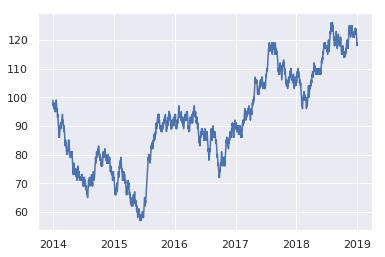

In [29]:
data.plot();

### リサンプリングと周期の変換
時系列データに対してよくある要求のひとつは、より高い、もしくはより低い周期でリサンプリングすることである。これは`resample()`メソッドを使用するか、よりシンプルな`asfreq()`メソッドをしようして行える。2つの主要な大きな違いは、`resample()`はデータアグリゲーションを基本とするのに対し、`asfreq()`はデータセレクションを基本とする。

ここで、年の始めのデータでリサンプルする。

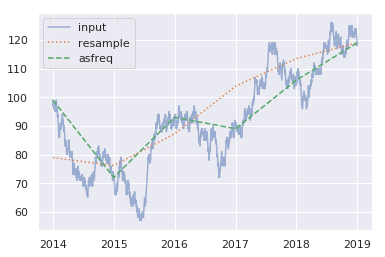

In [30]:
data.plot(alpha=0.5, style='-')
data.resample('A').mean().plot(style=':')
data.asfreq('AS').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

それぞれの点において、`resample`が年毎の平均となるのに対し、`asfreq`は年始めの値となっていることが分かる。

アップサンプリングに対しては、`resample()`と`asfreq()`は大体おなじであるが、resampleはより多くのオプションが利用可能である。この場合、デフォルトではどちらのメソッドもアップサンプルした点はNA値で満たされる。

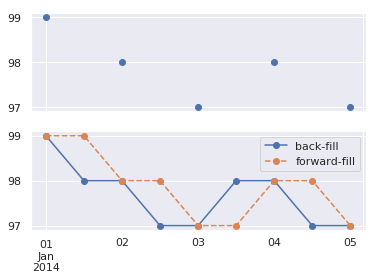

In [31]:
fig, ax = plt.subplots(2, sharex=True)
data5 = data.iloc[:5]
data5.asfreq('12H').plot(ax=ax[0], marker='o')

data5.asfreq('12H', method='bfill').plot(ax=ax[1], style='-o')
data5.asfreq('12H', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

上の図はアップサンプルした点はNA値のままのもの、下の図はアップサンプルした点をforwart-filling、backward-fillingで埋めたもの。

### Time-shifts
もう一つのよくある時系列操作は時間上のデータのシフトである。Pandasは2つの密接なメソッドを持つ。`shift()`と`tshift()`である。2つの違いを要訳すると、`shift()`はデータをシフトするのに対し、`tshift()`はインデックスをシフトする。

ここで、`shift()`と`tshift`で365日分時間をシフトする。

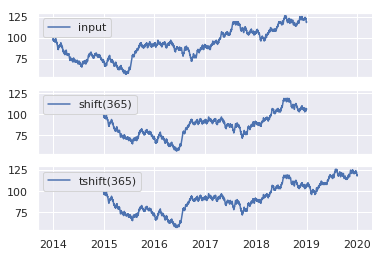

In [32]:
fig, ax = plt.subplots(3, sharex=True, sharey=True)

datad = data.asfreq('D', method='pad')

datad.plot(ax=ax[0])
datad.shift(365).plot(ax=ax[1])
datad.tshift(365).plot(ax=ax[2])

local_max = pd.to_datetime('2019-01-01')
offset = pd.Timedelta(365, 'D')

ax[0].legend(['input'], loc=2)
ax[1].legend(['shift(365)'], loc=2)
ax[2].legend(['tshift(365)'], loc=2)

`shift(365)`はデータを365日シフトしているが、インデックスはそのままであるため、後ろの部分が途切れているのが分かる。また、シフトした分の左側はNA値が入る。一方、`tshift(365)`はインデックスが365日分シフトしている。

この種のシフトは、前年比や前日比などを取る時などに役立つ。

### 窓のローリング
ローリング戦略は3つ目の時系列特有の操作である。`rolling()`の結果は`groupby`の結果と似ている。このローリングではデフォルトでいくつかの集計操作を行うことが出来る。

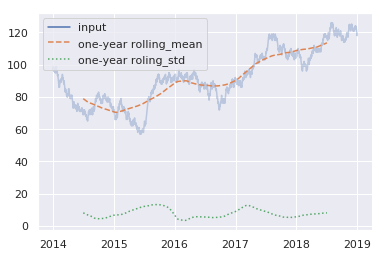

In [33]:
rolling = datad.rolling(365, center=True)

d = pd.DataFrame({'input': datad,
                  'one-year rolling_mean': rolling.mean(),
                  'one-year roling_std': rolling.std()})
ax = d.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)